In [ ]:
!pip install torch==1.9.0
!pip install torchaudio
!pip install torchvision
!pip install librosa

You should consider upgrading via the '/Users/rafaelperez/.virtualenvs/q_a/bin/python -m pip install --upgrade pip' command.
  Using cached torch-1.9.1-cp38-none-macosx_10_9_x86_64.whl (218.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0
    Uninstalling torch-1.9.0:
      Successfully uninstalled torch-1.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.
You should consider upgrading via the '/Users/rafaelperez/.virtualenvs/q_a/bin/python -m pip install --upgrade pip' command.
  Using cached torch-1.9.0-cp38-none-macosx_10_9_x86_64.whl (127.9 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1
    Uninstalling torch-1.9.1:
      Successfully uninstalled torch-1.9.1
ERROR: pip's dependency resolver does not curre

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset,TensorDataset, DataLoader, random_split
import librosa.display
import torchaudio
import pandas as pd
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import random
import tarfile
import torch.nn as nn
import torch.nn.functional as F


In [ ]:

df=pd.read_csv("./UrbanSound8K/metadata/UrbanSound8K.csv")


classes=list(df["class"].unique())

paths=dict()

for i in range(len(classes)):

    temp_df=df[df["class"] == classes[i]].reset_index()
    fold=temp_df["fold"].iloc[0]    # The fold of the first audio sample for the specific class
    sample_name=temp_df["slice_file_name"].iloc[0]
    path="./UrbanSound8K/audio/fold{0}/{1}".format(fold, sample_name)
    paths[classes[i]]=path

In [ ]:
classes

['dog_bark',
 'children_playing',
 'car_horn',
 'air_conditioner',
 'street_music',
 'gun_shot',
 'siren',
 'engine_idling',
 'jackhammer',
 'drilling']

In [ ]:
paths

{'dog_bark': './UrbanSound8K/audio/fold5/100032-3-0-0.wav',
 'children_playing': './UrbanSound8K/audio/fold5/100263-2-0-117.wav',
 'car_horn': './UrbanSound8K/audio/fold10/100648-1-0-0.wav',
 'air_conditioner': './UrbanSound8K/audio/fold5/100852-0-0-0.wav',
 'street_music': './UrbanSound8K/audio/fold7/101848-9-0-0.wav',
 'gun_shot': './UrbanSound8K/audio/fold1/102305-6-0-0.wav',
 'siren': './UrbanSound8K/audio/fold7/102853-8-0-0.wav',
 'engine_idling': './UrbanSound8K/audio/fold10/102857-5-0-0.wav',
 'jackhammer': './UrbanSound8K/audio/fold1/103074-7-0-0.wav',
 'drilling': './UrbanSound8K/audio/fold3/103199-4-0-0.wav'}

En este notebook procesaremos audio utilizando Pytorch, empezaremos con el audio en su forma de onda (archivo),luego lo convertiremos a un espectograma, realizaremos data augmentation, por ultimo  usaremos redes neuronales para procesarlos y extraer los vectores codificados dentro del espectograma.

El porcesamiento de audio con Deep Learning puede resolver distintos problemas:

  * Clasificacion de audio.

  * Segementación y separación de audio.

  * Clasificación de Generos Musicales.

  * Reconocimiento de Voz.

El input del modelo seran imagenes del espectograma de cada onda sonora, si el input es una imagen entonces podemos utilizar CNN, para el procesamiento de audio.

Cargamos los datos, usaremos el dataset UrbanSound8K dataset to train our network. Posee 10 clases y alrededor de 8k ejemplos.
El archivo esta comprimido y posee un csv con metadata.

Las categorias son:

 * Aire acondicionado.
 
 * Corneta de Carro
 
 * Niños jugando
 
 * Perro ladrando
 
 * Taladro 
 
 * Motor de vehiculo
 
 * Disparo
  
 * Martillo neumático
 
 * Sirena 
 
 * Musica Callejera

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


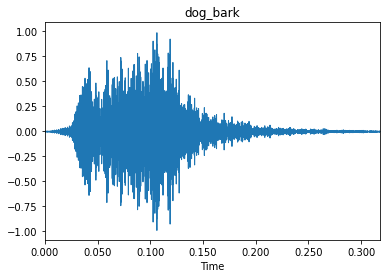

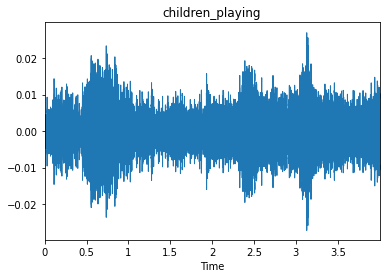

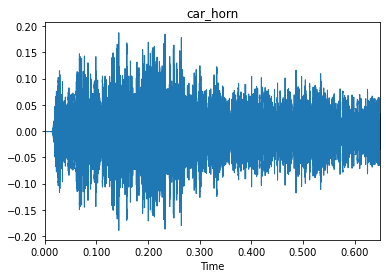

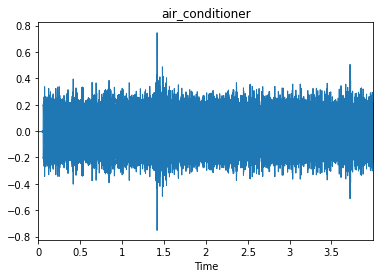

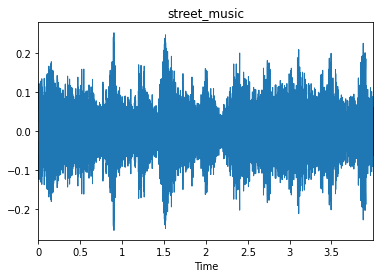

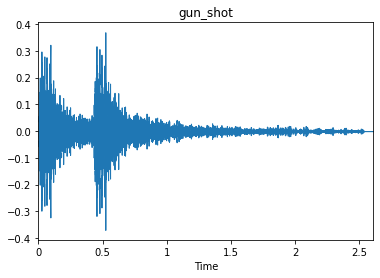

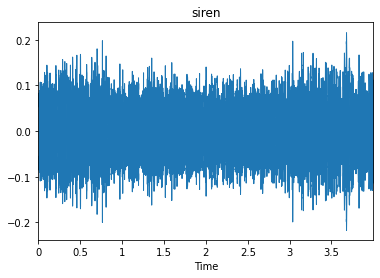

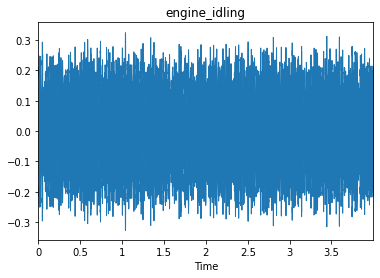

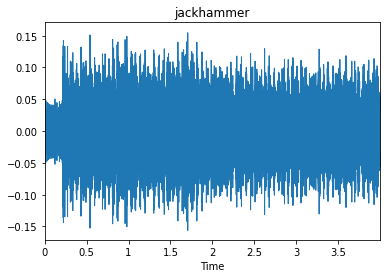

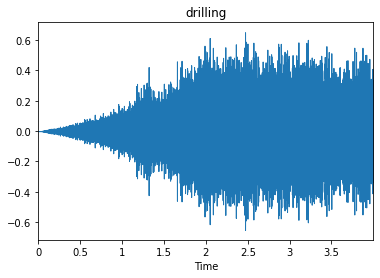

In [ ]:
for i, label in enumerate(classes):
    sample=paths[label]
    plt.clf()
    plt.title(label)
    data, sample_rate=librosa.load(sample)
    librosa.display.waveplot(data, sr=sample_rate)
    # plt.savefig("outputs/{}.png".format(label))
    plt.show()

In [ ]:
path=paths["drilling"]
audio, sr=librosa.load(path)
mfccs=librosa.feature.mfcc(audio, sr, n_mfcc=40)
mfccs.shape

(40, 173)

In [ ]:
def extract_mfcc(path):
    audio, sr=librosa.load(path)
    mfccs=librosa.feature.mfcc(audio, sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)

In [ ]:
df.fold.unique()

array([ 5, 10,  2,  6,  1,  9,  7,  4,  3,  8])

In [ ]:
features=[]
labels=[]
folds=[]
for i in range(len(df)):

    try:

        fold = df["fold"].iloc[i]
        filename=df["slice_file_name"].iloc[i]
        path="./UrbanSound8K/audio/fold{0}/{1}".format(fold, filename)
        mfccs=extract_mfcc(path)

        # dataset.append((mfccs,df["classID"].iloc[i]))
        features.append(mfccs)
        folds.append(fold)
        labels.append(df["classID"].iloc[i])

    except FileNotFoundError:

        pass
     

/Users/rafaelperez/.virtualenvs/q_a/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
/Users/rafaelperez/.virtualenvs/q_a/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
/Users/rafaelperez/.virtualenvs/q_a/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


In [ ]:
features=torch.tensor(features)
features
labels=torch.tensor(labels)
labels
folds=torch.tensor(folds)
folds
# Saving the dataset to disk to prevent re-Loading
torch.save(features, "./features_mfccs.pt")
torch.save(labels, "./labels.pt")
torch.save(folds, "./folds.pt")

In [ ]:
features=torch.load("./features_mfccs.pt")
labels=torch.load("./labels.pt")
folds=torch.load("./folds.pt")

In [ ]:
features

tensor([[-2.0994e+02,  6.3423e+01, -1.2369e+02,  ..., -6.6254e-01,
         -1.8982e+00,  1.3550e+00],
        [-4.1729e+02,  1.0015e+02, -4.3869e+01,  ...,  1.9851e+00,
         -2.0783e+00,  1.9852e+00],
        [-4.5277e+02,  1.1324e+02, -3.8502e+01,  ...,  4.1425e+00,
         -3.7913e-01,  1.0925e+00],
        ...,
        [-2.9775e+02,  1.0295e+02, -3.7630e+01,  ..., -1.2971e+00,
          9.6581e-01,  9.4197e+00],
        [-3.3721e+02,  1.1619e+02, -4.5747e+01,  ..., -6.4419e+00,
         -3.1682e+00,  7.2480e+00],
        [-3.0774e+02,  8.4129e+01, -2.6637e+01,  ...,  1.1472e+00,
         -1.2071e+01, -5.3266e+00]])

In [ ]:
def get_dataset(skip_fold):
    local_features=[]
    local_labels=[]
    for i in range(len(folds)):
        if folds[i]==skip_fold:
            continue
        local_features.append(features[i])
        local_labels.append(labels[i])
    local_features=torch.stack(local_features)
    local_labels=torch.stack(local_labels)
    return TensorDataset(local_features, local_labels)

In [ ]:
dataset=get_dataset(skip_fold=10)
len(dataset)

7895

In [ ]:
val_size=int(0.1*len(dataset))
train_size=len(dataset)-val_size

train_ds, val_ds=random_split(dataset, [train_size, val_size])

len(train_ds), len(val_ds)

(7106, 789)

In [ ]:
batch_size=128
train_loader=DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader=DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

# Looking at a batch of data
for x,y in train_loader:
    print(f"feautres: {x}\nlabels: {y}")
    print(f"dtypes: (x)->{x.dtype}, (y)->{y.dtype}")
    break

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


class AudioClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}


feautres: tensor([[-1.0618e+02,  1.1263e+02, -1.4674e+01,  ...,  3.8997e+00,
         -2.1815e+00,  4.3655e+00],
        [-6.2260e+01,  7.6641e+00, -1.2466e+02,  ...,  4.6750e-01,
         -2.6302e+00,  3.3833e+00],
        [-3.8381e+02,  1.2845e+02,  2.9313e+01,  ...,  9.8752e-01,
          3.0292e-02,  1.6318e+00],
        ...,
        [-9.5871e+01,  1.4147e+02, -5.4926e+00,  ..., -1.4062e-01,
          1.8404e-01,  5.8533e+00],
        [-5.4174e+02,  2.0686e+01,  4.8718e+00,  ...,  4.5794e+00,
          4.0987e+00,  4.5094e+00],
        [-1.9392e+02,  1.1625e+02, -2.9969e+01,  ..., -1.8739e+00,
         -4.5217e+00, -9.0096e+00]])
labels: tensor([7, 4, 6, 0, 8, 7, 7, 9, 1, 7, 1, 6, 4, 1, 5, 8, 8, 9, 5, 5, 1, 2, 9, 9,
        3, 3, 1, 7, 1, 1, 2, 3, 0, 2, 7, 3, 1, 4, 1, 4, 6, 2, 7, 9, 4, 7, 0, 1,
        5, 1, 3, 8, 2, 8, 8, 0, 2, 2, 9, 8, 9, 2, 5, 2, 2, 9, 9, 9, 8, 8, 3, 7,
        0, 8, 3, 8, 8, 2, 2, 2, 3, 2, 8, 4, 7, 6, 3, 3, 5, 7, 0, 2, 7, 7, 5, 2,
        9, 9, 9, 9, 7, 3, 4, 3

In [ ]:
input_size=40   # Since we're generating 40 mfccs, the number of input features is 40
output_size=10
class UrbanSound8KModel(AudioClassificationBase):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(input_size,128),
            nn.ReLU(),

            nn.Linear(128, 64),
            nn.ReLU(),

            nn.Linear(64,output_size),
            nn.Sigmoid()
        )

    def forward(self, x_batch):
        return self.network(x_batch)

class UrbanSound8KModel2(AudioClassificationBase):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(input_size,128),
            nn.ReLU(),

            nn.Linear(128, 256),
            nn.ReLU(),

            nn.Linear(256, 512),
            nn.ReLU(),

            nn.Linear(512,64),
            nn.ReLU(),

            nn.Linear(64,output_size),
            nn.Tanh()
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:

def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs')

def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

In [ ]:
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# Defining an instance that moves all the tensors (DataLoaders) into the default device
class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

# Moving the data to the device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [ ]:
def evaluate(model, val_loader):
    model.eval()
    outputs=[model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def train(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD, print_loss=True):
    torch.cuda.empty_cache()
    history=[]
    optimizer=opt_func(model.parameters(), lr)

    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        with torch.no_grad():
            result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        # model.epoch_end(epoch, result)
        history.append(result)
        if print_loss:
            print(f"Epoch [{epoch}]: Validation loss -> {result['val_loss']}, Validation accuracy -> {result['val_acc']}")
    return history

In [ ]:
model=UrbanSound8KModel()
model
# Moving the model to the GPU
to_device(model, device)

model2=UrbanSound8KModel2()
model2
history=[evaluate(model, val_loader)]
history
history2=[evaluate(model2, val_loader)]
history2


[{'val_loss': 2.3839070796966553, 'val_acc': 0.1423788219690323}]

In [ ]:
epochs=20
lr=0.01
history+=train(epochs, lr, model, train_loader, val_loader)


Epoch [0]: Validation loss -> 2.221679925918579, Validation accuracy -> 0.17575468122959137
Epoch [1]: Validation loss -> 2.1585781574249268, Validation accuracy -> 0.2473958432674408
Epoch [2]: Validation loss -> 2.1038641929626465, Validation accuracy -> 0.3122342526912689
Epoch [3]: Validation loss -> 2.086397886276245, Validation accuracy -> 0.2976190745830536
Epoch [4]: Validation loss -> 2.0609326362609863, Validation accuracy -> 0.3523065745830536
Epoch [5]: Validation loss -> 2.041997194290161, Validation accuracy -> 0.3870110511779785
Epoch [6]: Validation loss -> 2.0388903617858887, Validation accuracy -> 0.3723958432674408
Epoch [7]: Validation loss -> 2.0157954692840576, Validation accuracy -> 0.37887969613075256
Epoch [8]: Validation loss -> 2.0079870223999023, Validation accuracy -> 0.3979591727256775
Epoch [9]: Validation loss -> 2.0201761722564697, Validation accuracy -> 0.3466198742389679
Epoch [10]: Validation loss -> 2.0078608989715576, Validation accuracy -> 0.37574

In [ ]:
epochs=20
lr=0.01
history2+=train((epochs, lr, model2, train_loader, val_loader)

plot_accuracies(history)
plot_accuracies(history2)
plot_losses(history)
plot_losses(history2)